In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### MERGING 12 MONTHS OF DATA INTO A SINGLE FILE

In [2]:
'''files = [file for file in os.listdir('Data/SalesAnalysis/Sales_Data')]

all_months_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('Data/SalesAnalysis/Sales_Data/' + file)
    all_months_df = pd.concat([all_months_df, df])

all_months_df.head(10000)

all_months_df.to_csv('all_data.csv', index = False)'''

"files = [file for file in os.listdir('Data/SalesAnalysis/Sales_Data')]\n\nall_months_df = pd.DataFrame()\n\nfor file in files:\n    df = pd.read_csv('Data/SalesAnalysis/Sales_Data/' + file)\n    all_months_df = pd.concat([all_months_df, df])\n\nall_months_df.head(10000)\n\nall_months_df.to_csv('all_data.csv', index = False)"

In [3]:
all_data = pd.read_csv('Data/all_data.csv')

#### CLEANING THE DATA

In [4]:
filt = all_data.isna().any(axis=1)
nan_df = all_data[filt]
nan_df


all_data = all_data.dropna(how = 'any')

all_data.head(265)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
260,295907,AA Batteries (4-pack),2,3.84,12/18/19 08:43,"672 Dogwood St, Austin, TX 73301"
261,295908,20in Monitor,1,109.99,12/17/19 10:28,"342 Adams St, New York City, NY 10001"
262,295909,AA Batteries (4-pack),1,3.84,12/27/19 17:29,"360 Wilson St, Boston, MA 02215"
263,295910,Lightning Charging Cable,1,14.95,12/27/19 22:46,"6 Wilson St, Seattle, WA 98101"


#### FIND 'OR' VALUES AND DELETE IT

In [5]:
'''filt1 = all_data['Order Date'].str[0:2]=='Or'
temp_df = all_data[filt1]
temp_df.head()'''

"filt1 = all_data['Order Date'].str[0:2]=='Or'\ntemp_df = all_data[filt1]\ntemp_df.head()"

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head(255)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
250,295898,AA Batteries (4-pack),1,3.84,12/21/19 11:28,"375 Spruce St, San Francisco, CA 94016"
251,295899,USB-C Charging Cable,1,11.95,12/13/19 16:44,"722 Spruce St, Seattle, WA 98101"
252,295900,AA Batteries (4-pack),1,3.84,12/27/19 18:56,"283 Washington St, Boston, MA 02215"
253,295901,20in Monitor,1,109.99,12/05/19 20:02,"67 12th St, San Francisco, CA 94016"


#### ADD MONTH COLUMN (HAS 2 ISSUES)
1.) THE DATA HAS NAN VALUES AND 
2.) THE DATA HAS STRING VALUES

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### ADD A SALES COLUMN

In [8]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']


#### WHAT WAS THE BEST MONTH FOR SALES ? AND HOW MUCH WAS EARNED THAT MONTH ?

In [9]:
'''monthly_data = all_data.groupby('Month')
monthly_data['Sales'].sum'''



"monthly_data = all_data.groupby('Month')\nmonthly_data['Sales'].sum"

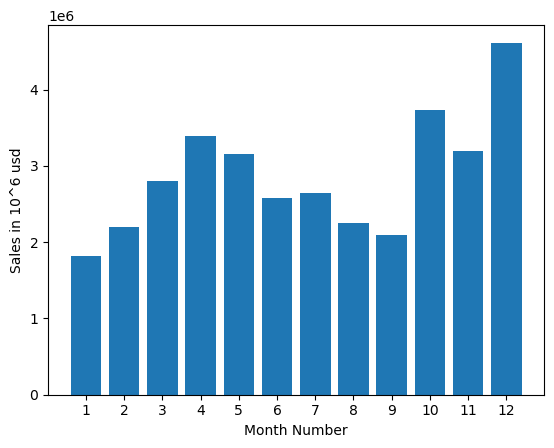

In [13]:
results = all_data.groupby('Month').sum()
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in 10^6 usd')
plt.show()

#### WHAT CITY HAD THE HIGHEST NUMBER OF SALES ?

In [19]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

city_data = all_data.groupby(['City']).sum()
city_data['Sales']




City
Atlanta  (GA)          2795498.58
Austin  (TX)           1819581.75
Boston  (MA)           3661642.01
Dallas  (TX)           2767975.40
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Portland  (ME)          449758.27
Portland  (OR)         1870732.34
San Francisco  (CA)    8262203.91
Seattle  (WA)          2747755.48
Name: Sales, dtype: float64

TypeError: unhashable type: 'numpy.ndarray'

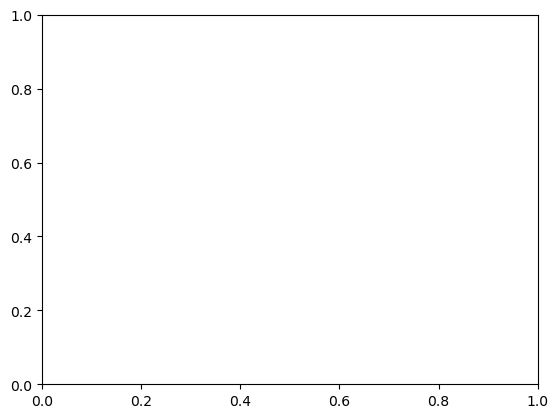

In [21]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('city name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()